Welcome to the KNN Project. The project is based on classfied data,the data
is standadised then a KNN model is trained and its perfomace is evaluated and improved. 

**Calling the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**Reading the data source, checking the first 5 entries and their respective headings and
the seeing the dataframe's deatils.**

In [37]:
classfied_data = pd.read_csv('KNN_Project_Data')
classfied_data.head()
classfied_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


**Standardizing the datavalues then using the transform() method to transform the features to a scaled version.**

In [8]:
scaler = StandardScaler()
scaler.fit(classfied_data.drop(['TARGET CLASS'], axis = 1 ))
scaled_features = scaler.transform(classfied_data.drop(['TARGET CLASS'], axis = 1 ))
scaled_features_df = pd.DataFrame(scaled_features, columns = classfied_data.columns[:-1])

**Creating the model, and fitting the standardised data into the model and evaluate it.**

In [31]:
X = scaled_features_df
y = classfied_data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3,random_state = 100)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       357
           1       0.74      0.77      0.75       343

    accuracy                           0.75       700
   macro avg       0.75      0.75      0.75       700
weighted avg       0.75      0.75      0.75       700



**Creating a graph of errors vs k values to choose the best k value**

In [13]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))

**Ploting the graph of errors vs k**

Text(0, 0.5, 'Error Rate')

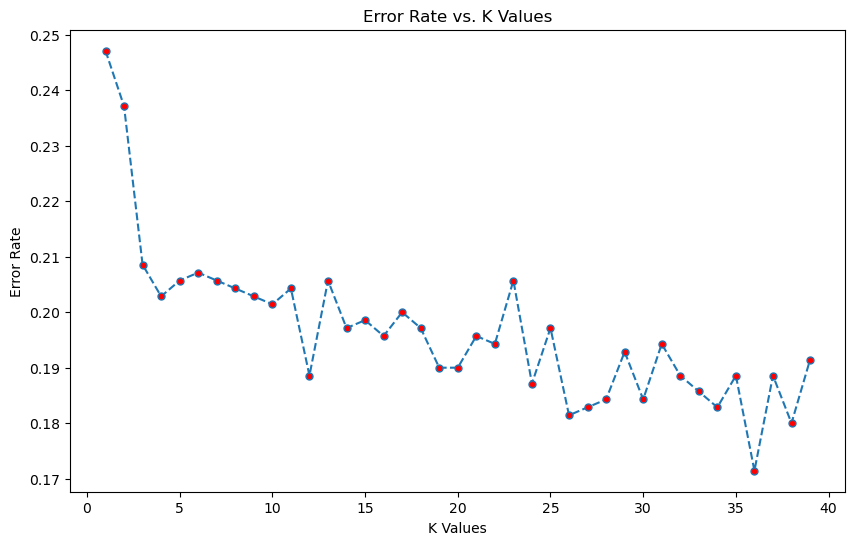

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, ls= '--', marker = 'o',markerfacecolor = 'red', markersize = 5)

plt.title('Error Rate vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Error Rate')

**Retraining the model with a better K value and then evaluate the model's performance.**

In [33]:
knn = KNeighborsClassifier(n_neighbors = 36)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       357
           1       0.80      0.87      0.83       343

    accuracy                           0.83       700
   macro avg       0.83      0.83      0.83       700
weighted avg       0.83      0.83      0.83       700

